In [8]:
# Import libraries necessary for this project
import pandas as pd
import numpy as np

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


In [2]:
# Minimum price of the data
minimum_price = np.min(prices)

# Maximum price of the data
maximum_price = np.max(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.


** Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each.**

**Hint:** This problem can phrased using examples like below.  
* Would you expect a home that has an `'RM'` value(number of rooms) of 6 be worth more or less than a home that has an `'RM'` value of 7?
* Would you expect a neighborhood that has an `'LSTAT'` value(percent of lower class workers) of 15 have home prices be worth more or less than a neighborhood that has an `'LSTAT'` value of 20?
* Would you expect a neighborhood that has an `'PTRATIO'` value(ratio of students to teachers) of 10 have home prices be worth more or less than a neighborhood that has an `'PTRATIO'` value of 15?

**Answer: **

*'RM'* : 
As the value of 'RM' increases, the 'MEDV' will also increase. (Because more rooms indicates that the size of the house is also large)

*'LSTAT'* : 
Higher value of 'LSTAT' means that the percentage of lower class workers is high in the neighborhood. Therefore, an increase in the value of 'LSTAT' will decrease the value of 'MEDV'

*'PTRATIO'* : 
Lower value of 'PTRATIO' means that the the ratio students:teachers is low, i.e., the school is big and reputed. This somehow means that the locality is good, which indicates that the value of 'MEDV' will be high.
But, a very low ratio would mean that there are very less students in the school. It could be probably because the locality might be in the outskirts. So, if this ratio goes below a certain threshold, the value of 'MEDV' will decrease with further decrease in the ratio

In [3]:
# Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

In [4]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


* Would you consider this model to have successfully captured the variation of the target variable? 
* Why or why not?

** Hint: **  The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable. In other words:
* R2 score of 0 means that the dependent variable cannot be predicted from the independent variable.
* R2 score of 1 means the dependent variable can be predicted from the independent variable.
* R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An 
* R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

**Answer:**

**YES**. The model has captured approx. 92% of the variance in Y(here 'Prediction') from the independent variable X(here 'True Value')

In [5]:
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=1)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing

* What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?

**Hint:** Think about how overfitting or underfitting is contingent upon how splits on data is done.

**Answer: **

If we train our model on all the data available to us, and test it on some proportion of the same data, it will be of no use. We cannot successfully deploy this kind of model for a real-life problem.
So, the solution is to split the data into a training set and a testing set. *The testing set should be used ONLY for testing the model, after its training has been finished.* Now, the splitting should be done in such a way that there is enough data available for training (i.e., there is no underfitting), but at the same time the model should not overfit/memorize the given data.

### Learning Curves

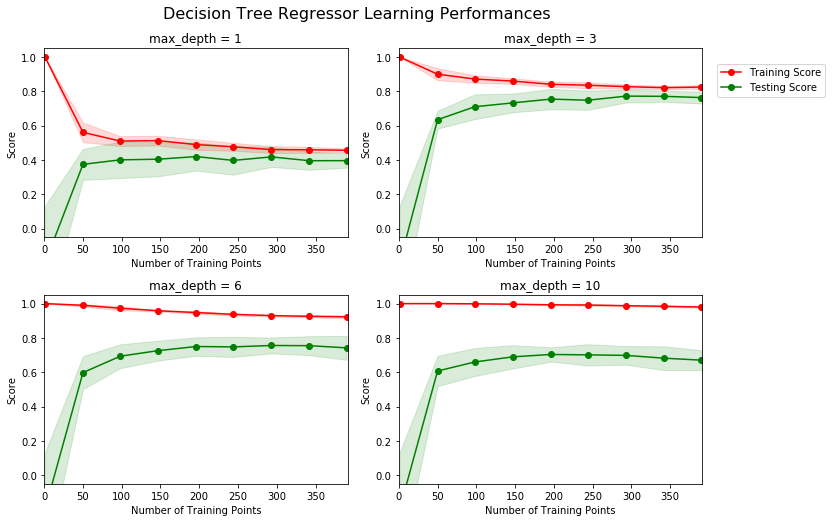

In [6]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
* Choose one of the graphs above and state the maximum depth for the model. 
* What happens to the score of the training curve as more training points are added? What about the testing curve? 
* Would having more training points benefit the model? 

**Hint:** Are the learning curves converging to particular scores? Generally speaking, the more data you have, the better. But if your training and testing curves are converging with a score above your benchmark threshold, would this be necessary?
Think about the pros and cons of adding more training points based on if the training and testing curves are converging.

**Answer: **

The graph of the Decision Tree with *max_depth = 3* is the best suited graph.

For the Training Curve - 
As more training points are added, the r2 score gets decreased. But, after a certain no. of data points, the score becomes almost constant. This shows that the model will initially give some error, but it will gradually become constant after sometime.

For the Testing Curve - 
As more training points are added, the r2 score gets better (i.e., it gets closer to 1.0). This shows that the model has *learned* from the data points provided to it, and hence it is making better predictions. But ultimately, this also becomes almost constant with increase in the no. of data points.

*Yes*, having more training points will certainly help the model. But, after a certain no. of data points, any further increase in that number will not bring much change in the r2 score of the model.

### Complexity Curves

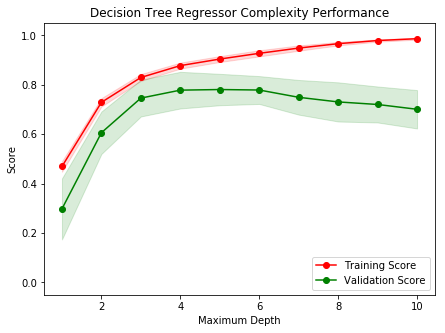

In [9]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
* When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? 
* How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?

**Hint:** High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well). Think about which model(depth 1 or 10) aligns with which part of the tradeoff.

**Answer: **

When maximum depth is 1, it is a *High Bias Model*. We can see in the plot that when maximum depth is 1, the training and validation score are both low. This shows that the model is not able to extract features about the data, which basically means that it is underfitting.

When maximum depth is 10, it is a *High Variance Model*. In the graph, when the maximum depth is 10, the score of the training data is very high (indicating the model performed very good on the training set), but, the Validation score is low. This shows that the model was *learning* the training data and hence did not performed well on the validation data. This also indicates that the model is overfitting.

### Question 6 - Best-Guess Optimal Model
* Which maximum depth do you think results in a model that best generalizes to unseen data? 
* What intuition lead you to this answer?

** Hint: ** Look at the graph above Question 5 and see where the validation scores lie for the various depths that have been assigned to the model. Does it get better with increased depth? At what point do we get our best validation score without overcomplicating our model? And remember, Occams Razor states "Among competing hypotheses, the one with the fewest assumptions should be selected."

**Answer: **

The maximum depth of *3* would result is the best model.

This is because as the maximum depth increases any further (even at 4), the difference between the training and validation score also starts to increase indicating the model's tending to overfit the data.

Also, the score of the training and validation data at the maximum depth of 3 is significantly higher than the score at a maximum depth of 2.

Therefore, 3 appears to be an optimal choice.

### Question 7 - Grid Search
* What is the grid search technique?
* How it can be applied to optimize a learning algorithm?

** Hint: ** When explaining the Grid Search technique, be sure to touch upon why it is used,  what the 'grid' entails and what the end goal of this method is. To solidify your answer, you can also give an example of a parameter in a model that can be optimized using this approach.

**Answer: **
   
A model behaves differently when its parameters are changed. The Grid Search Technique is used to obtain the best set of parameters (from the combination of different values for different parameters) under which the given model will perform the best.

Suppose there are 2 parameters of a model to be tuned (X and Y).
X can have values [0, 1] and Y can have values [1, 2, 3]
So, the possible combinations for (X, Y) would be (0, 1), (0, 2), (0, 3), (1, 1), (1, 2), (1, 3)

When applying Grid search technique, the 'grid' will contain the errors produced when each of these parameters are used in the model. One can then select the parameter set producing the minimum error.

For example, this technique can be used for a decision tree, with the parameter in consideration being the 'maximum depth'
A grid could be obtained indicating for what value of 'maximum depth', the model has performed the best.

*Note: A subset of data is used for testing, and the rest for training. The error is calculated using the testing set.*

### Question 8 - Cross-Validation

* What is the k-fold cross-validation training technique? 

* What benefit does this technique provide for grid search when optimizing a model?

**Hint:** When explaining the k-fold cross validation technique, be sure to touch upon what 'k' is, how the dataset is split into different parts for training and testing and the number of times it is run based on the 'k' value.

When thinking about how k-fold cross validation helps grid search, think about the main drawbacks of grid search which are hinged upon **using a particular subset of data for training or testing** and how k-fold cv could help alleviate that. You can refer to the [docs](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for your answer.

**Answer: **

Cross-validation, generally means taking a subset of the *training data* (as the cross-validation data) to check the model before finally using the testing data.

In k-fold cross validation, the training data is equally divided into k subsets.
Then, one of the k subsets is used as the cross-validation data and the rest as the training data. 
This is repeated k times (each of the k subsets are used for cross-validation once).
- Based on the value of k, the data is split. Suppose the value of k is 5, then there would be 5 subsets in total. This means that 20% of data would be used for cross-validation and 80% for training the model (for each cross-validation set).
Finally, the average error (average of the errors obtained by using k diferent cross-validation sets) is returned.


This technique gives a very clear idea of how 'generalized' our model is.

*How is k-fold cross-validation better than Grid Search ?*

In grid search, there are 2 subsets of data - one for training and one for testing. While tweaking the parameters of the model (after testing the model on the test data), in order to improve the model might make the model overfit the testing data itself. This would result in a non-generalized model, which used testing data for training itself. 

But, if k-fold CV is used, as mentioned above, a subset of the training data is used for crodd-validation. Therefore, the testing data is untouched till the model is finally ready and hence it has an advantage over Grid Search.

### Implementation: Fitting a Model

In [44]:
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # A decision tree regressor object
    regressor = DecisionTreeRegressor()

    # A dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': list(range(1, 11))}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)
    
    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Question 9 - Optimal Model

* What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?  

In [45]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 5 for the optimal model.


**Answer: **

The optimal model has a 'max_depth' of 5.
In *Question 6*, my guess for the 'max_depth' was of 3.

* I went a little bit deeper and viewed the whole grid. Turned out - when 'max_depth' = 3, that model was ranked 5th. **

### Question 10 - Predicting Selling Prices
* What price would you recommend each client sell his/her home at? 
* Do these prices seem reasonable given the values for the respective features? 

In [46]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $419,700.00
Predicted selling price for Client 2's home: $287,100.00
Predicted selling price for Client 3's home: $927,500.00


**Answer: **

Predicted selling price for Client 1's home: $419,700.00

Predicted selling price for Client 2's home: $287,100.00

Predicted selling price for Client 3's home: $927,500.00

** Yes. These prices perfectly align with the hypothesis that I provided in  Question 1 - Feature Observation**

*Of the three clients, client 3 has has the biggest house, in the best public school neighborhood with the lowest poverty level; while client 2 has the smallest house, in a neighborhood with a relatively high poverty rate and not the best public schools.*

** Below is the answer I provided in Question 1 **

- *'RM'* : 
As the value of 'RM' increases, the 'MEDV' will also increase. (Because more rooms indicates that the size of the house is also large)

- *'LSTAT'* : 
Higher value of 'LSTAT' means that the percentage of lower class workers is high in the neighborhood. Therefore, an increase in the value of 'LSTAT' will decrease the value of 'MEDV'

- *'PTRATIO'* : 
Lower value of 'PTRATIO' means that the the ratio students:teachers is low, i.e., the school is big and reputed. This somehow means that the locality is good, which indicates that the value of 'MEDV' will be high.
But, a very low ratio would mean that there are very less students in the school. It could be probably because the locality might be in the outskirts. So, if this ratio goes below a certain threshold, the value of 'MEDV' will decrease with further decrease in the ratio

### Sensitivity

In [47]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $419,700.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


### Question 11 - Applicability

* In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.  

**Answer: **

- How relevant today is data that was collected from 1978? How important is inflation?

    - The time period in consideration is of almost 40 years. It's a lot !!. There might be thousands of events that would have happened in those 40 years, which would affect everything (let alone the price of houses). Therefore, in my opinion, the data from 1978 might not be very relevant.  *Inflation* is probably a very good solution for this problem. Before 40 years, the price of a house (whose current price is say - \$300,000) might have been \$10,000. So, if we take that value directly, it would make *no sense at all*. Inflation is very important to arrive at an estimate of the price of a house, given its what its price was before a certain time period.
    

- Are the features present in the data sufficient to describe a home? Do you think factors like quality of apppliances in the home, square feet of the plot area, presence of pool or not etc should factor in?

    - No, these 3 features are not sufficient to describe a home. They might be the one with more weight than others, but surely they are not enough. I definitely think that factors such as - presence of a swimming pool, beach facing backyard etc, should be taken into account. They will bring an improvement in our predictions.
    

- Is the model robust enough to make consistent predictions?

    - As we can see when we calculated the 'Sensitivity', the range in prices in the prediction for a particular client was around $69,000. This is a large difference. Therefore, the model is not robust enough to make consistent predictions.
    

- Would data collected in an urban city like Boston be applicable in a rural city?

    - Definitely Not. The data of a rural city would be considerably different from that of an urban city. (For example - In a rural city, the price of a house might be low even if its size is large, if most of the house is a farm)
    

- Is it fair to judge the price of an individual home based on the characteristics of the entire neighborhood?

    - Its not entirely correct to judge the price of an individual home based on the features of the entire neighbourhood, but since we are also considering the characteristics of the house itself, the prediction can become sensible. I think that if we predict the prices of houses individually, our model would be overfitting, and therefore not generalized. Therefore, having the combination of features of both the neighborhood and the house itself it the best way. 